In [25]:
import pickle as pk
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from descartes.patch import PolygonPatch
import numpy as np
import random

In [27]:
realData=dict()
realDatalist=pk.load(open("TrafficFactor.pkl","rb"))
for i in range(len(realDatalist)):
    realData[i]=realDatalist[i]

FileNotFoundError: [Errno 2] No such file or directory: 'TrafficFactor.pkl'

In [28]:
gaData=open("../Website/backend/OutputFolder/TrafficFactor.txt","r")
f=gaData.readlines()
f=[]

In [29]:
gaData.seek(0)
gaData=gaData.readlines()
gaData=list(map(lambda x:x[:len(x) -1],gaData))
gaData=list(map(lambda x:int(x),gaData))

In [30]:
gaData

[1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


In [31]:
ga=dict()
for index,value in enumerate(gaData):
    ga[index]=value

In [32]:
convexDict=pk.load(open("./Outputs/ConvexDict.pkl","rb"))

In [56]:
# def getColours():
#     d=dict()
#     r,g,b=211,211,211
#     for i in range(80):
#         d[i]=[r/255,g/255,b/255]
#         r-=2
#         g-=2
#         b-=2
#     return d
#     d[0]=[135/255,206/255,250/255]
#     d[1]=[30/255,144/255,255/255]
#     d[2]=[0,0,139/255]
#     d[3]=[255/255,127/255,80/255]
#     d[4]=[255/255,69/255,0]
#     d[5]=[255/255,140/255,0]
#     d[6]=[255/255,160/255,122/255]
#     d[7]=[220/255,20/255,60/255]
#     d[8]=[128/255,0,0]
#     d[9]=[238/255,130/255,238/255]
#     d[10]=[255/255,0,255/255]
#     d[11]=[128/255,0,128/255]

In [33]:
def getColours(K):
    d=dict()
    r,g,b=255,255,255
    cut=255/K
    for i in range(K):
        d[i]=[r/255,g/255,b/255]
        r-=cut
        g-=cut
        b-=cut
    return d

/home/rahul/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


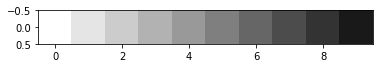

In [34]:
from skimage import io
colorDict=getColours(10)
color=[]
for k,v in colorDict.items():
    color.append(v)
color=np.array(color)
indices = np.random.randint(0, len(color), size=(2, 2))
plt.imshow([color])

In [63]:
def darken(trafficMatrix,NumColors):
    kDict=trafficMatrix
    fig=pk.load(open("Outputs/Simulator.pkl","rb"))
    plt.figure(figsize=(20,20))
    hue=sorted([(k,v) for k,v in kDict.items()],key=lambda x:x[1])
    #colors=[[220,220,220],[211,211,211],[192,192,192],[169,169,169],[128,128,128],[105,105,105],[119,136,153],[47,79,79],[0,0,0]]
    colors=getColours(NumColors)
    seen=[False]*NumColors
    for sector,k in hue:
        if k >= NumColors:
            k=NumColors-1
        x,y=zip(*convexDict[sector])
        colour=colors[k]
        if(not seen[k]):
            plt.fill(x,y,facecolor=colour,label=k)
            seen[k]=True
        else:
            plt.fill(x,y,facecolor=colour,label=f"_{k}")
    plt.legend(prop={'size': 16})

In [24]:
darken(realData,1,20)

NameError: name 'realData' is not defined

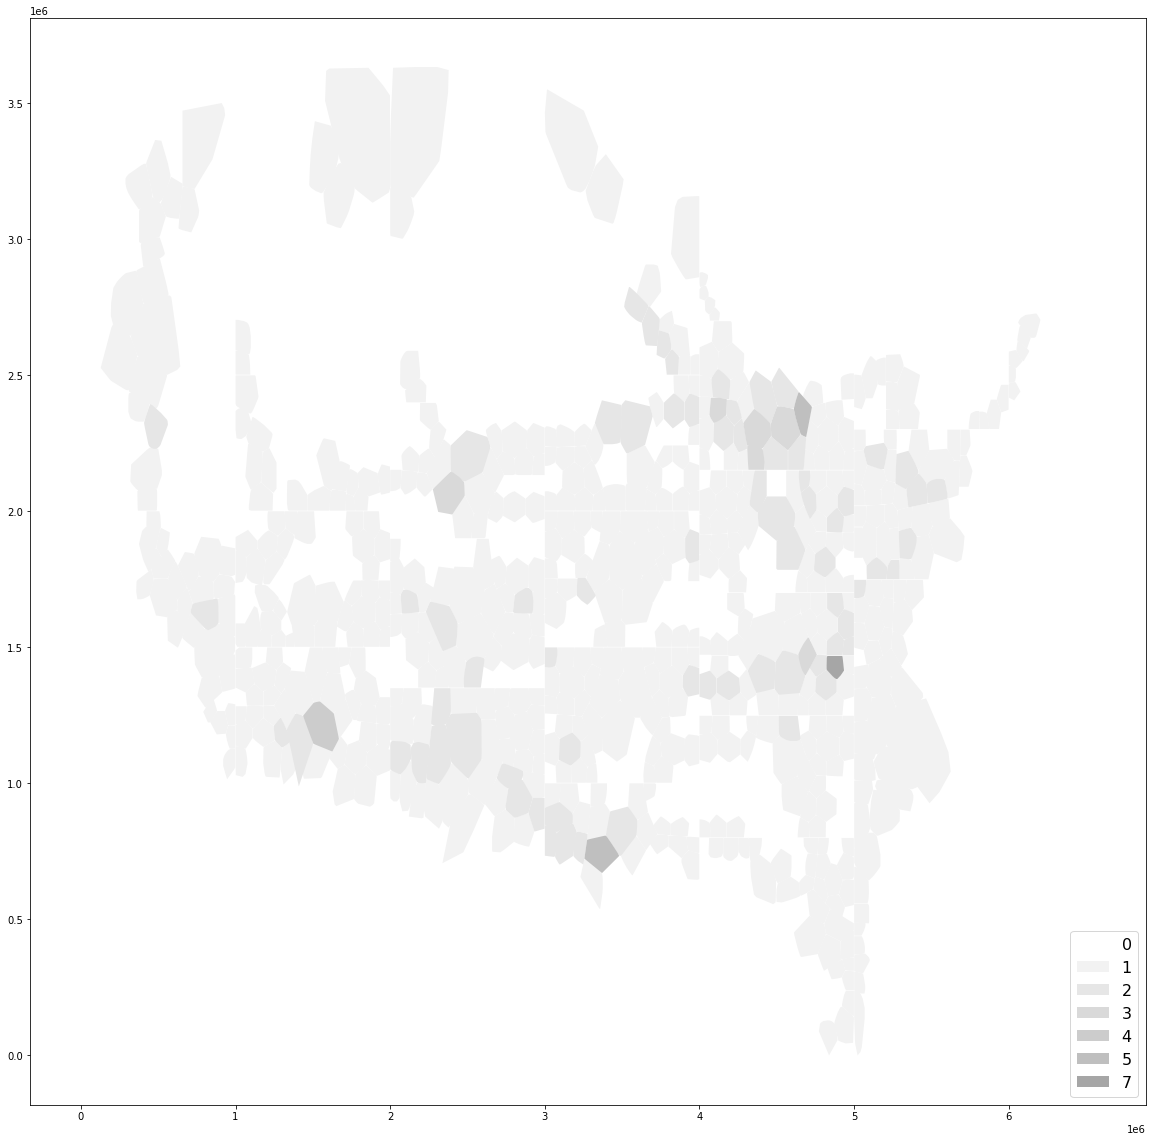

In [64]:
darken(ga,20)